# Finding cell type and organ-specific markers from expression data

This notebook will help you find marker proteins for specific cells and organs by intersecting gene expression, protein annotation, and mass spectrometry data.

## Step 1: import necessary helper functions and set up datasets

The dictionary **all_data** contains all datasets and will be updated as new processed data is created.
It includes conversion dictionaries from uniprot to gene name and back, all the gene expression data, mass-spec data, and single-cell RNA seq attributions for neurons.

In [1]:
#setup wrapper functions
from setup import setup_datasets
from tau_calculations import make_taus
from tau_calculations import count_gene_categories
from tau_calculations import make_unified_gene_list,unify_tau_dataframes
from intersect_genes import scatterplot_tau, cutoff_heatmap
from intersect_genes import get_specific_tau, get_final_list

brain_cell_type = 'neurons'
organ_type = 'Brain'
all_data = setup_datasets(brain_cell_type, organ_type)

Importing protein annotations/ID conversions...


100%|████████████████████████████████| 203711/203711 [00:03<00:00, 52473.79it/s]
/Users/siddharthiyer/Dropbox (MIT)/DAT/Computational/Surface_Markers/bin/import_surfacemarker_data.py:22: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations = pd.read_csv('../data/prot_ann/uniprotkb_homo_sapiens_AND_model_organi_2023_12_06.tsv',  sep='\t')


Done!
Importing mass spectrometry data...
Done!


## Step 2: Calculate tau values and look at potential cutoffs manually.

Here I am using the list **max_uniprots_TMU** to create a unified tau dataframe. This downselects genes to those which are transmembrane proteins and are maximally expressed in my cell-type and organ of interest.

If you want to look at a different list of genes, I have made some below. Feel free to make your own.\
**full_uniprots**: all genes which are found in both the organ and cell\
**max_uniprots**: all genes which are maximally expressed in both the organ and cell\
**full_uniprots_TMU**: all transmembrane-protein genes which are found in both the organ and cell\
**full_uniprots_TMU**: all transmembrane-protein genes which are maximally expressed in both the organ and cell\

Example code to make your own list of non-transmembrane protein genes in both organ and cell:

```
nonTMU_uniprots = []
for u in all_data['full_uniprots']:
    if u not in all_data['TMU']:
        nonTMU_uniprots.append(u)
all_data['nonTMU_uniprots'] = nonTMU_uniprots
selected_list = 'nonTMU_uniprots'
```


Creating unified gene lists...
Done!
Unifying tau values into a single matrix...


291it [00:00, 7654.46it/s]


Done!
Creating scatterplots of tau-score with all genes or only genes expressed most in brain/neurons
              out of all tissues/cell-types, and with all types of proteins
              or only transmembrane proteins...


55321it [00:02, 19069.38it/s]
783it [00:00, 15487.79it/s]
4925it [00:00, 18225.34it/s]
291it [00:00, 13014.82it/s]


Done!
There are 291 transmembrane proteins with maximum in Brain/neurons.



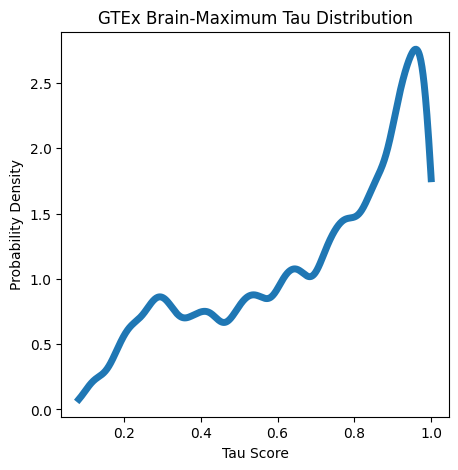

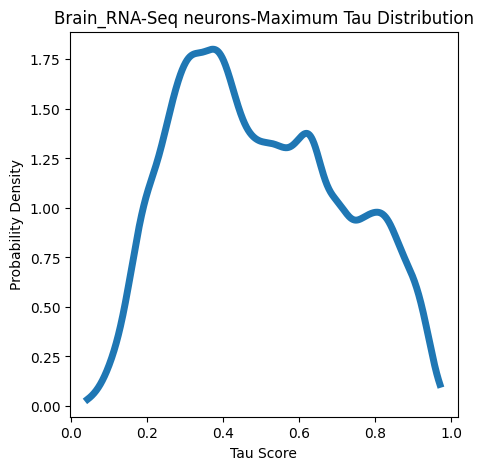

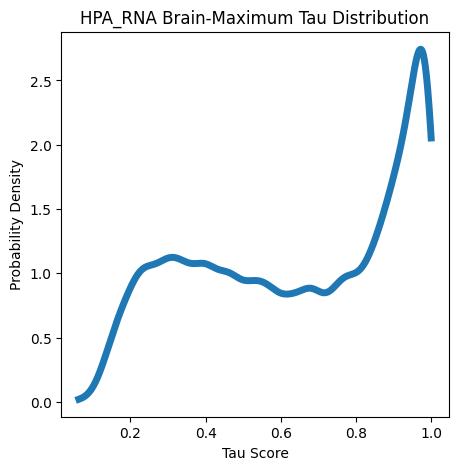

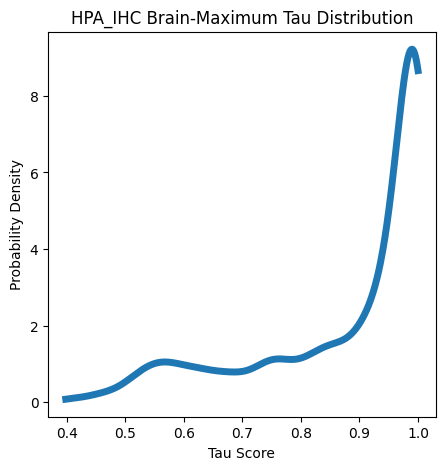

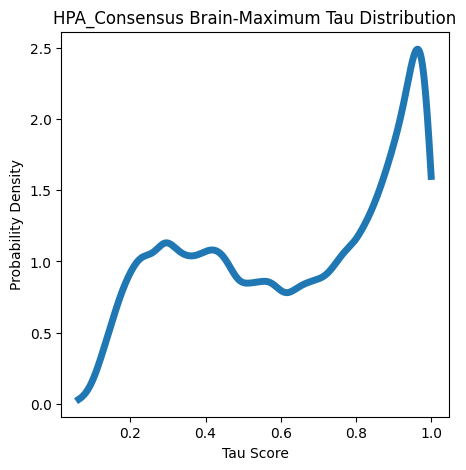

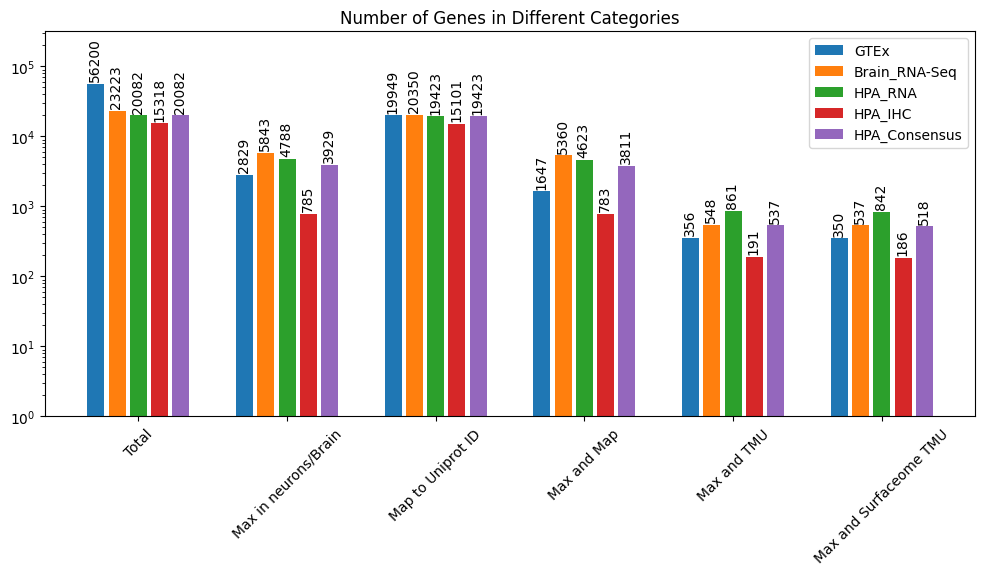

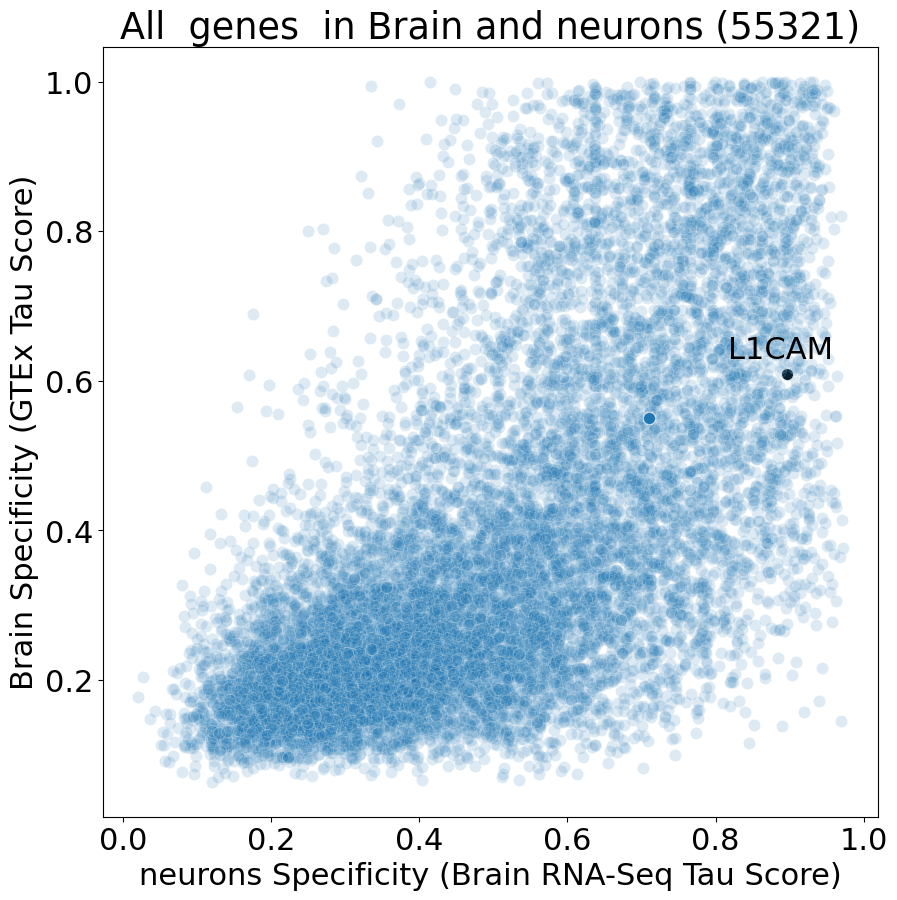

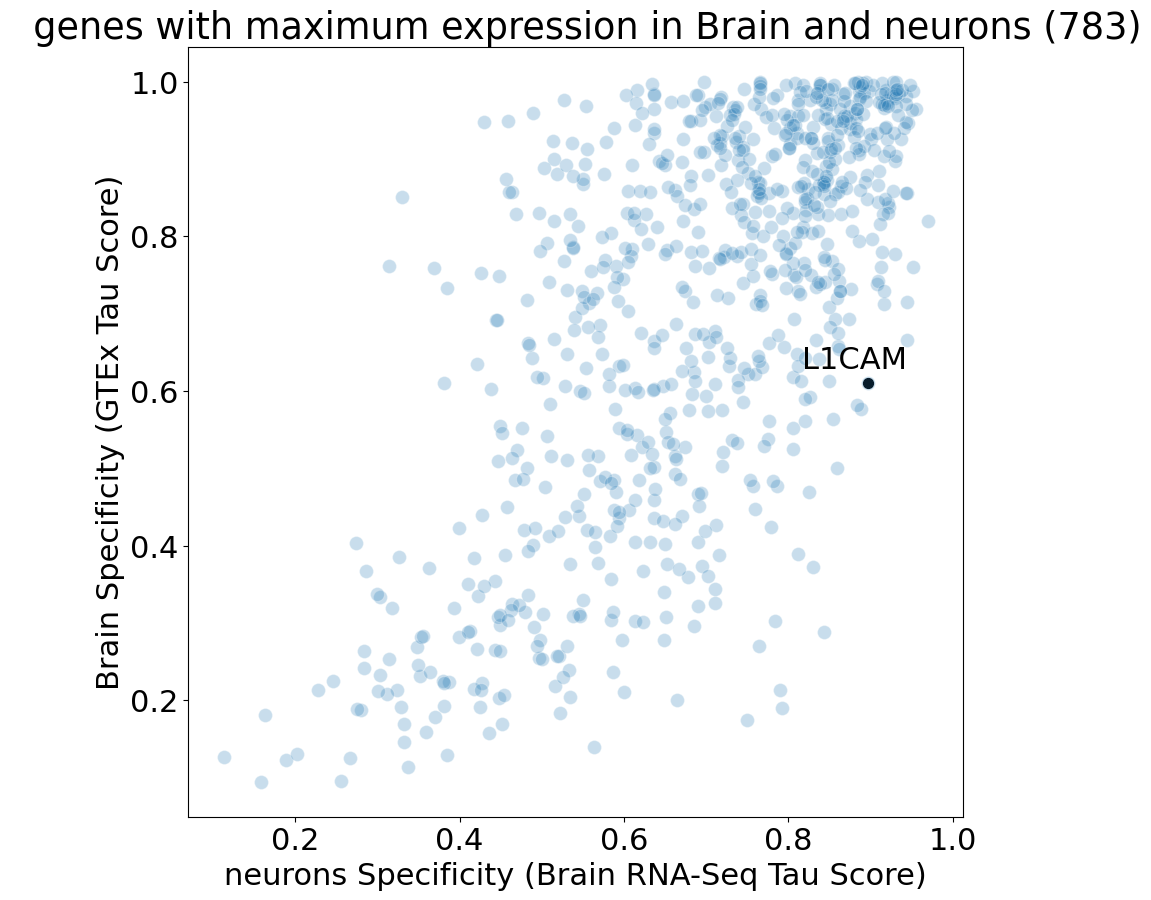

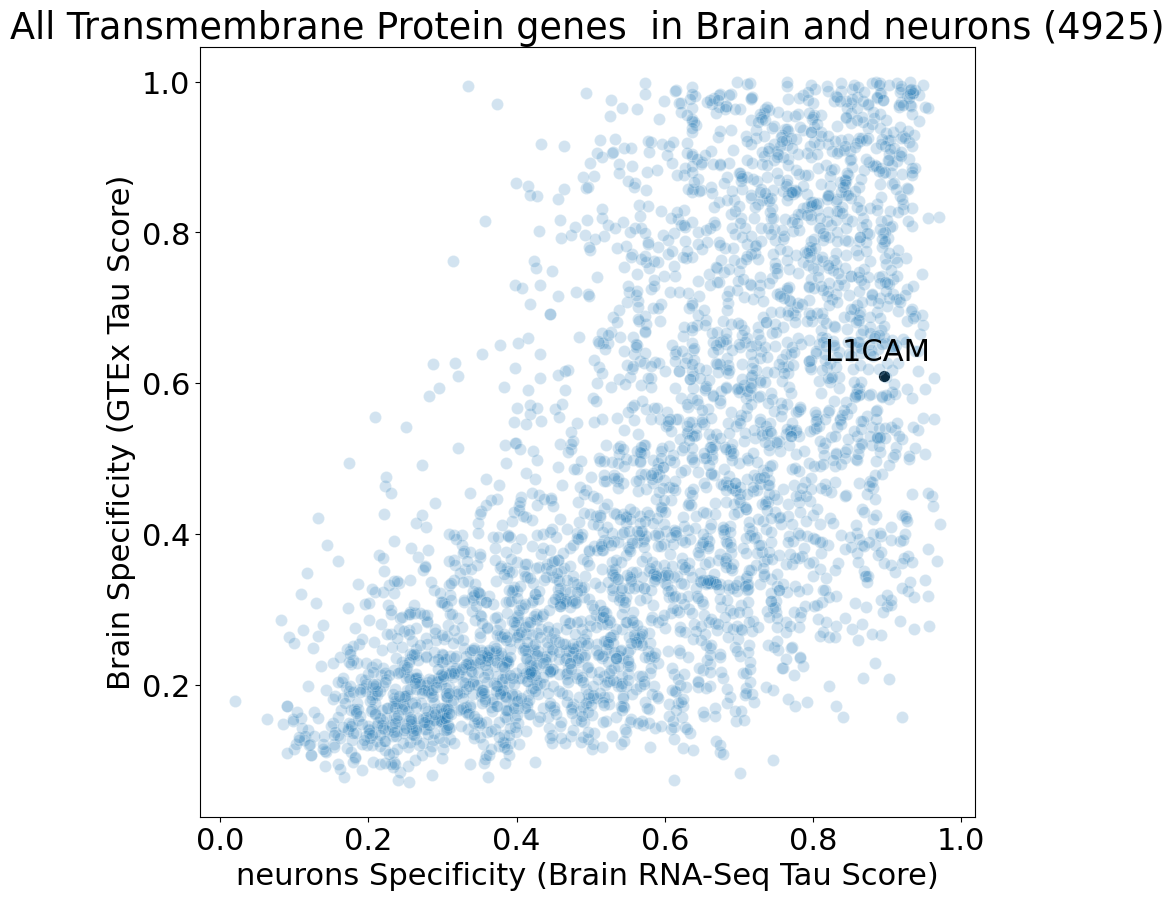

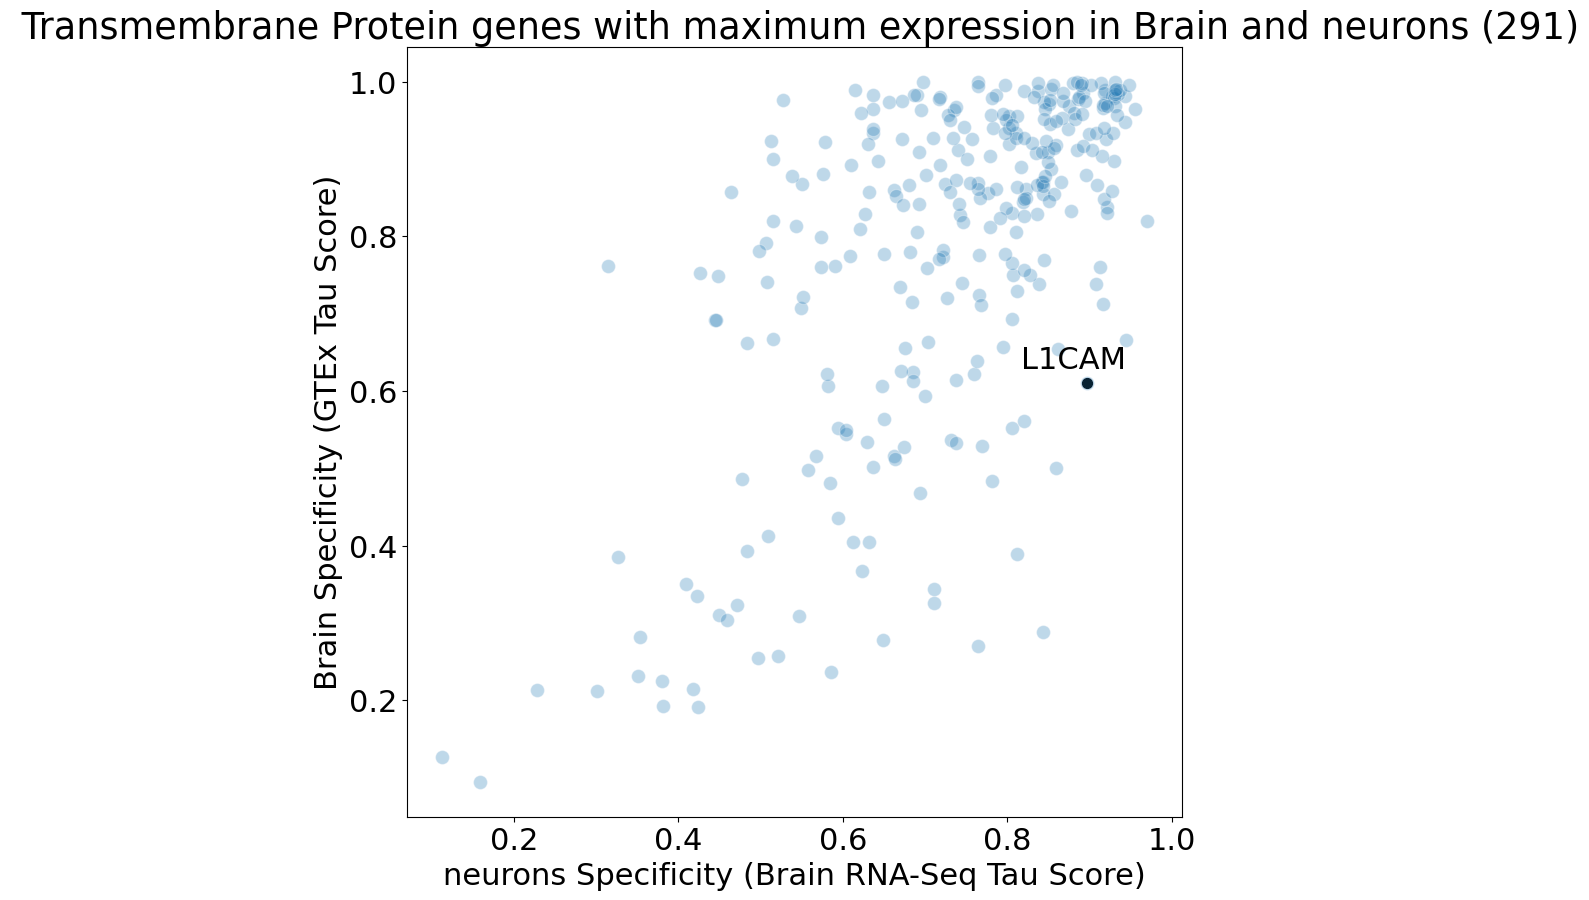

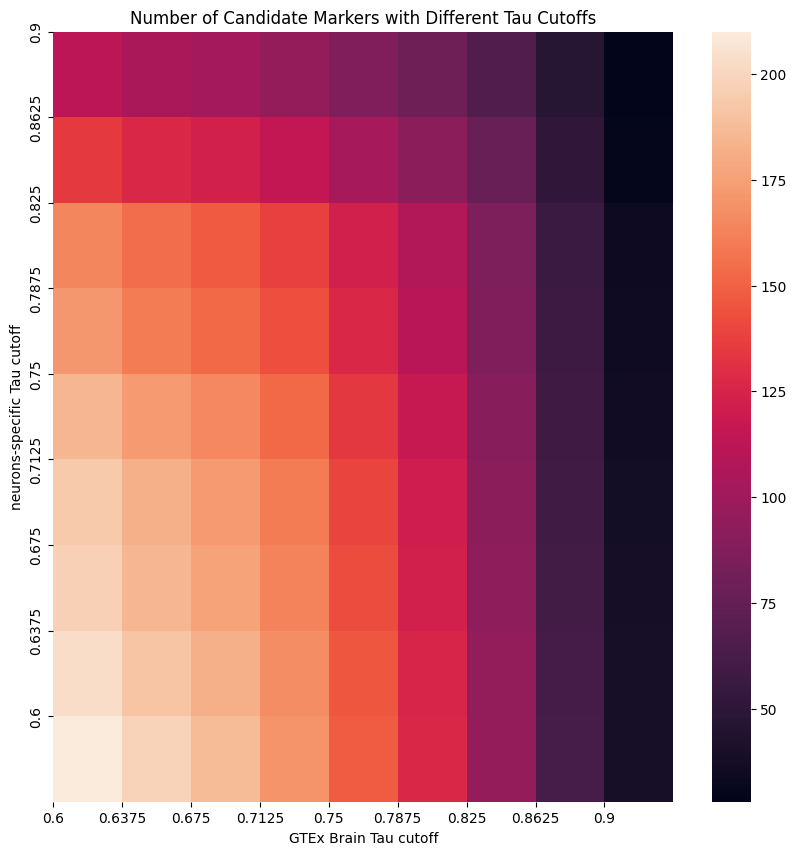

In [2]:
all_data = make_taus(all_data)
count_gene_categories(all_data)
all_data = make_unified_gene_list(all_data)

nonTMU_uniprots = []
for u in all_data['full_uniprots']:
    if u not in all_data['allTMU']:
        nonTMU_uniprots.append(u)
all_data['nonTMU_uniprots'] = nonTMU_uniprots
selected_list = 'nonTMU_uniprots'

all_data = unify_tau_dataframes(all_data, all_data['max_uniprots_TMU'])
all_data= scatterplot_tau(all_data, to_denote = ['L1CAM'])
cutoff_heatmap(all_data, tau_min=0.6, tau_max=0.9)


In [23]:
all_data['candidates']

,Unnamed: 0,attribution,surfaceome,DT Mass Spec - Plasma,DT Mass Spec - CSF,DT Mass Spec - Neuron Culture,HPPP - Plasma,HPPP - CSF,iPSC Proteomics,Guldbrandsen2014,Zhang2007,Macron2018,Schutzer2010,Begcevic2016,Thompson2020,Muraoka2020,Thompson2018,Chiasserini2014,Sum in Mass Spec,Transmembrane
gene,,,,,,,,,,,,,,,,,,,,
GRID1,404,0.001003,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
GABRG2,118,0.002180,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
SAMD12,363,0.001072,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
LRRC7,120,0.002162,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
GAD2,237,0.001466,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACNA2D1,364,0.001072,False,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,10,True
CHGA,318,0.001195,False,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,11,False
CDH2,396,0.001014,True,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,11,True


## Step 3: Pick cutoff values for Tau, and intersect with mass-spec data to get a final list of genes.

Here you can select different tau cutoffs, and also play around with a different number of markers to show in the heatmap. This will also automatically save the full list of genes with tau values and mass spec appearances as a csv under the name provided in the variable **exp_name**.

Optional: Set **cluster_tau** to **True**, to use K-means clustering instead of manual cutoffs to get specific orgna and cell specific genes.

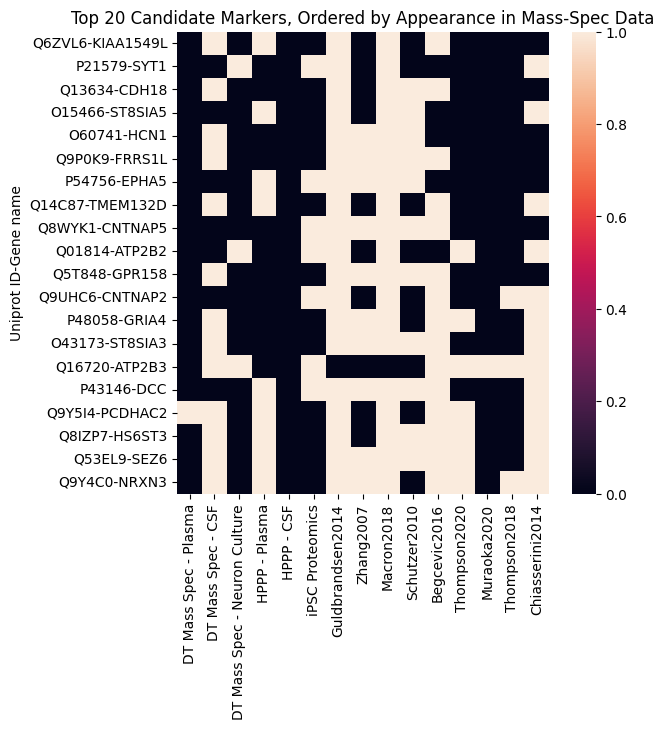

In [26]:
all_data = get_specific_tau(all_data, 
                                 organ_tau_cutoff = 0.7,
                                  cell_tau_cutoff = 0.7,
                                 cluster_tau = False)

all_data = get_final_list(all_data, exp_name = '20230730', topk= 20, use_scimilarity = False)
mass_spec = all_data['candidates']['DT Mass Spec - Plasma'] + all_data['candidates']['DT Mass Spec - CSF'] 
bulk = []
gene_names = [g for u,g in all_data['candidates'].index]
for i in range(all_data['candidates'].shape[0]):
    if mass_spec[i] > 0:
        bulk.append(gene_names[i])


## Look at a single gene of interest if you want

Enter the gene you want to look at below to get information about its Tau score and how it appears in mass-spec.

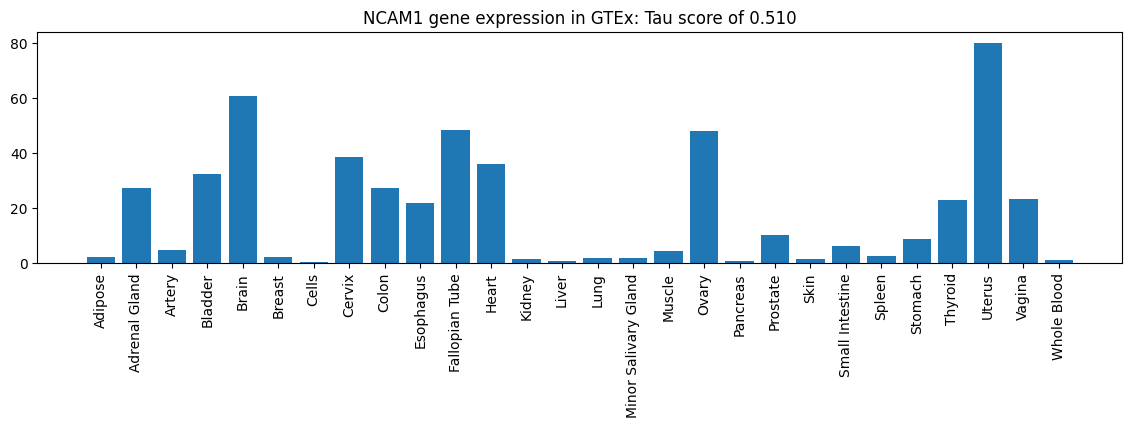

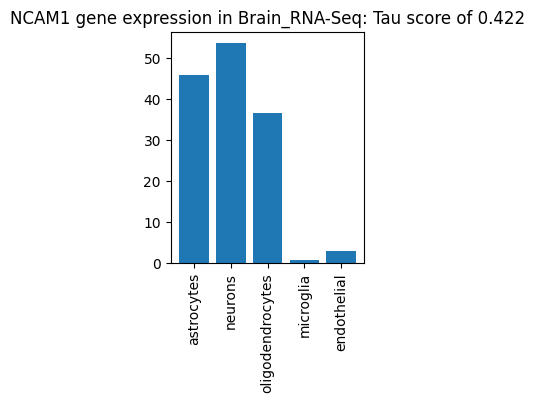

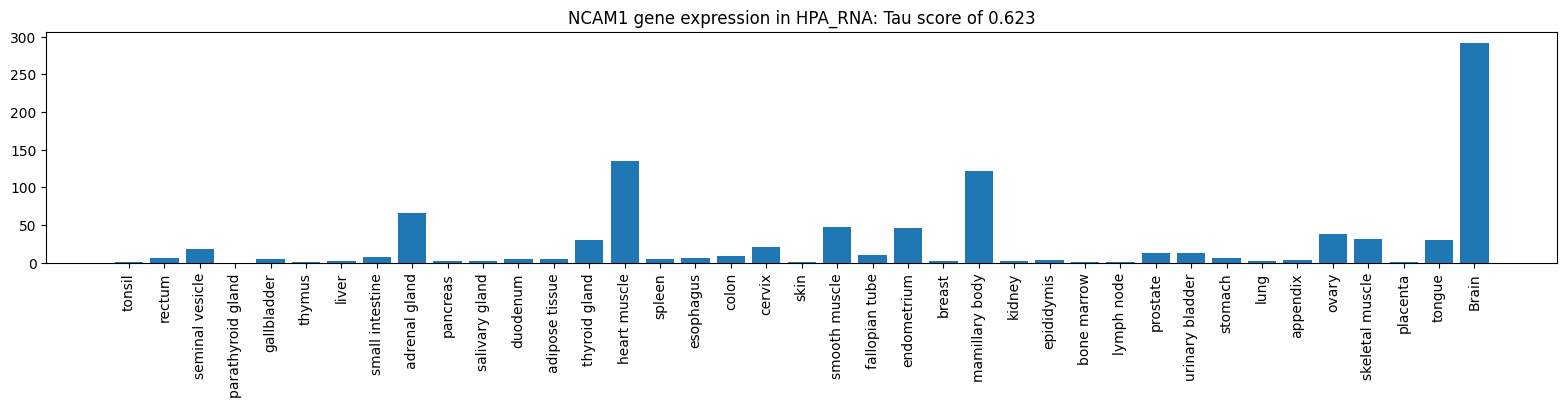

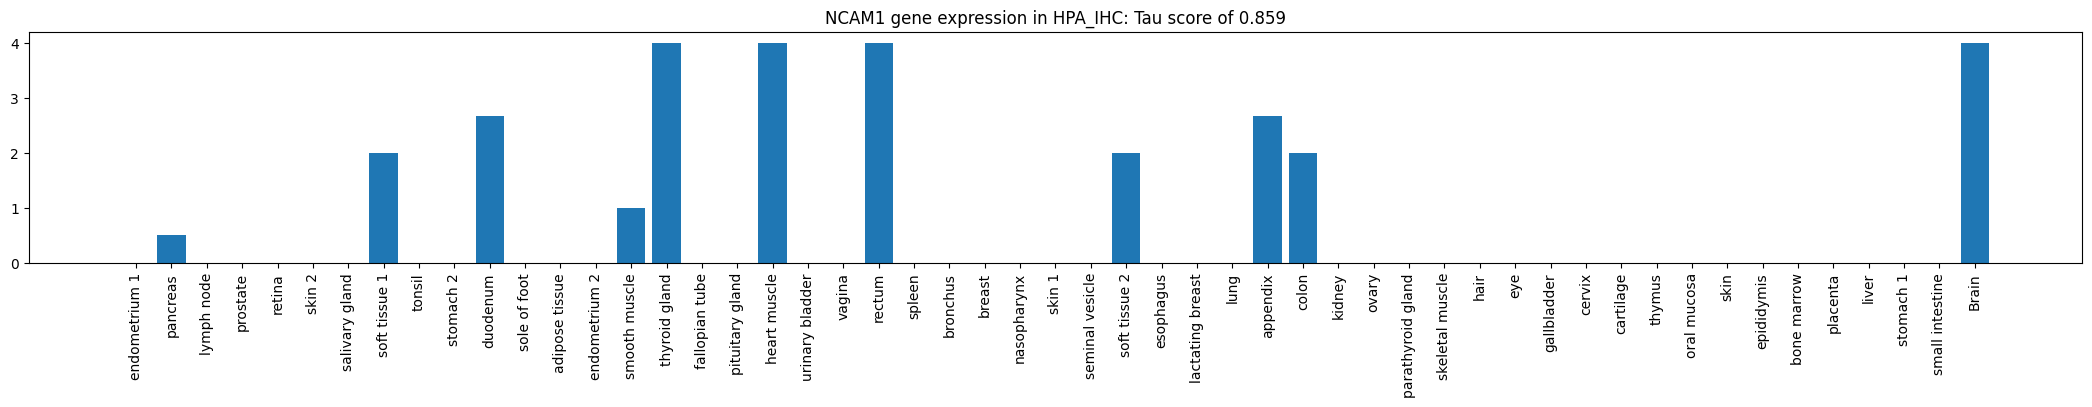

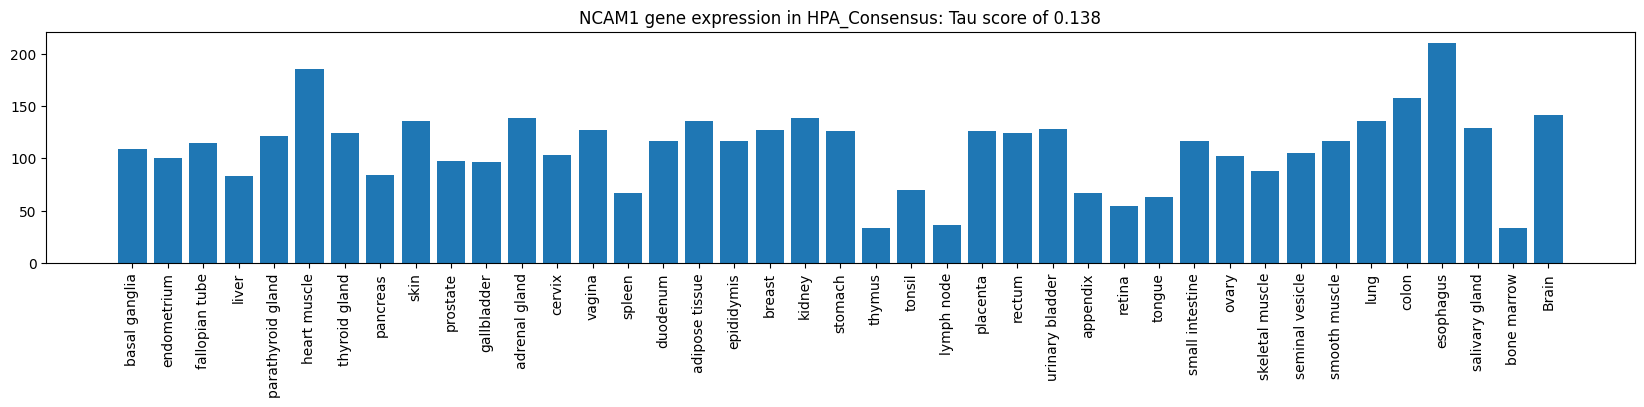

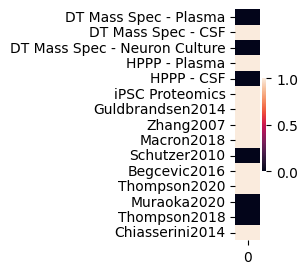

In [38]:
from intersect_genes import single_gene_info

gene_name = 'NCAM1'
single_gene_info(gene_name, all_data)

Neuron-specific genes by sCimilarity: 405


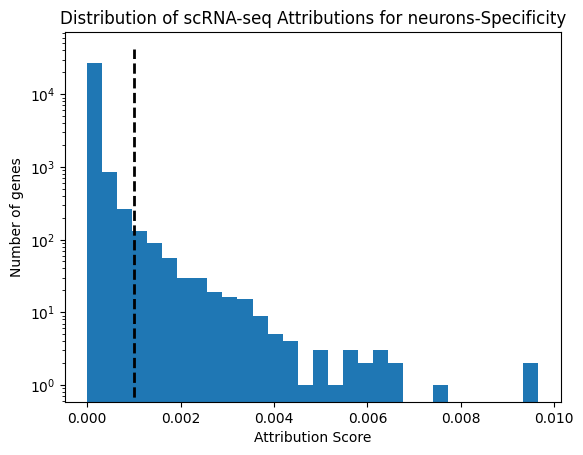

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title('Distribution of scRNA-seq Attributions for {}-Specificity'.format(brain_cell_type))
plt.xlabel('Attribution Score')
plt.ylabel('Number of genes')
plt.hist(all_data['scRNA_data']['attribution'], bins = 30)
# plt.ylim(top = 4.2e4)
plt.plot([0.001, 0.001], [0,4.2e4], color='black', linestyle='dashed', linewidth=2, markersize=12)
plt.yscale('log')
plt.savefig('../results/graham_scrna_attr_hist_{}.svg'.format(brain_cell_type),
            bbox_inches = 'tight', transparent = True)
print('Neuron-specific genes by sCimilarity: {}'.format(sum(all_data['scRNA_data']['attribution']>0.001)))

## Making tables for supplement

In [6]:
f = open('../results/table_s2.csv', 'w+')
f.write('Number,Gene Name\n')
for i, u in enumerate(all_data['allTMU']):
    if u in all_data['u2g']:
        f.write('{},{}\n'.format(i,all_data['u2g'][u]))
f.close()

In [7]:
f = open('../results/table_s3_brain_neuron_specific.csv', 'w+')
f.write('Number,Gene Name, Transmembrane Domain?\n')
for i, u in enumerate([u for u,g in all_data['specific_tau'].index]):
    if u in all_data['u2g']:
        f.write('{},{},{}\n'.format(i,all_data['u2g'][u], u in all_data['allTMU']))
f.close()

In [8]:
f = open('../results/table_s4_scimilarity.csv', 'w+')
f.write('Number,Gene Name, SCimilarity Attribution Score, Transmembrane Domain?\n')
TMU_class = []
for i, g, score in zip(np.arange(all_data['scRNA_data'].shape[0]), 
                       all_data['scRNA_data']['gene'],
                       all_data['scRNA_data']['attribution']):
    if g in all_data['oldg2u']:
        tm = all_data['oldg2u'][g] in all_data['allTMU']
        f.write('{},{},{},{}\n'.format(i,g, score, tm))
    elif g in all_data['g2u']:
        tm = all_data['g2u'][g] in all_data['allTMU']
        f.write('{},{},{},{}\n'.format(i,g, score, tm))
f.close()

In [9]:
f = open('../results/table_s5_scimilarity_and_bulk_specific.csv', 'w+')
f.write('Number,Gene Name, Transmembrane Domain?\n')
TMU_class = []
number =0
bulk_specific_uniprots = [u for u,g in all_data['specific_tau'].index]
for i, g, score in zip(np.arange(all_data['scRNA_data'].shape[0]), 
                       all_data['scRNA_data']['gene'],
                       all_data['scRNA_data']['attribution']):
    if g in all_data['oldg2u']:
        u = all_data['oldg2u'][g]
    elif g in all_data['g2u']:
        u = all_data['g2u'][g]
    if u in bulk_specific_uniprots and score >0.001:
        f.write('{},{},{}\n'.format(number,g, u in all_data['TMU']))
        number += 1
f.close()

## Saving transmembrane, gene-expression specific candidates

In [10]:
all_data['scRNA_data']

,Unnamed: 0,gene,attribution,surfaceome
0,0,NRXN1,0.009655,True
1,1,NRXN3,0.009546,True
2,2,GRIK2,0.007645,True
3,3,CADM2,0.006588,True
4,4,GRIN2B,0.006572,True
...,...,...,...,...
28226,28226,LINC02485,0.000000,False
28227,28227,AC103831.1,0.000000,False
28228,28228,AC103809.1,0.000000,False
28229,28229,AC103808.3,0.000000,False


In [18]:
sum([u in all_data['allTMU'] for u in all_data['mass_spec'][1]])

423